In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#imported all the libraries we need and loading the dataset

In [3]:
df= pd.read_csv(r"D:\lubi\projects\ict_Assignments\KMEANS_CLUSTERING\Wine_clust.csv")

In [4]:
#Fetching some information about the data

In [5]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [8]:
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [9]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


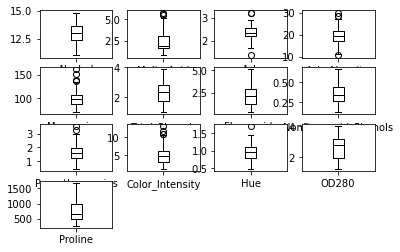

In [10]:
df.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

In [11]:
#Data preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

data_cluster=df.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [13]:
#Checking if the Standardization was made correctly, looking for mean=0 and std=1

In [14]:
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [15]:
# clustering without Principal Component Analysis

In [16]:
#step 1: To determine no. of clusters

In [17]:
#Elbow method: TO find optimal value of k

In [18]:
#WCSS: within the cluster sum of squares. 
#what are the features for clustering
feature_set=df.iloc[:,0:14].values
feature_set

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [19]:
#elbow method:optimal value of k

In [20]:
#WCSS... plot WCSS v/s no. of clusters

In [21]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101) 
    km.fit(feature_set) 
    wcss.append(km.inertia_)#distance of each point from the centroid wcss

# from the grapg...optimal k=5

C:\Users\adeeb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


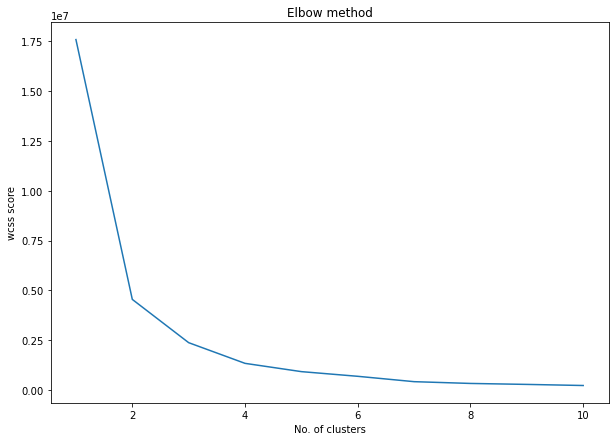

In [22]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss score')
plt.show()


In [23]:
# from the graph...optimal k value=3. because from there,no much change in slope. gradual decrease in wcss value.that elbow point is the k value

In [24]:
#train my data such that i should get 3 clusters

In [25]:
km=KMeans(n_clusters=3,init='k-means++',n_init=10,random_state=101)
km.fit(feature_set)
y = km.fit_predict(df)

print(y)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [26]:
df['km_3']=km.labels_
df
#data_cluster['km_3']=km.labels_
#data_cluster

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,km_3
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### Kmeans clustering without dimension reduction(without pca)

#### visualization


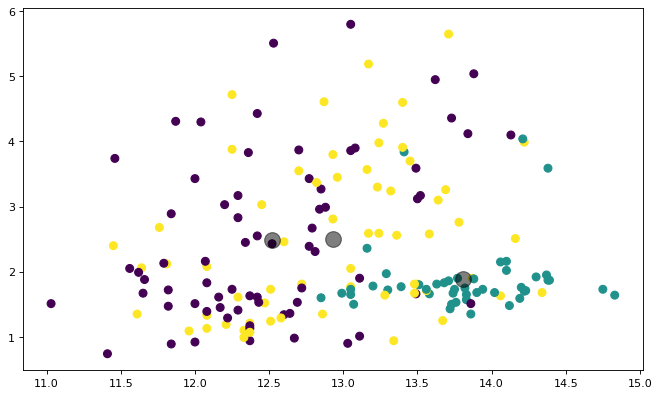

In [27]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(feature_set[:, 0], feature_set[:, 1], c=y, s=50, cmap='viridis')

centers = km.cluster_centers_
centroids = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# My findings


In [28]:
# Here we takes the entire columns as the feature set without any dimension reduction
# So when we apply k means clustering to the  the given dataset:
# we got the number of clustors=3 using elbow method
# It should have partition the given data set into 3 distinct clusters.
# But due the lack of using PCA to dimension reduction-
# - we got 3 distinct colored group but they are not formed 3  distinct clusters

## Kmeans clustering by using PCA

In [29]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)

In [30]:
pc_arr = pc.fit_transform(df)
pc_arr.shape

(178, 2)

In [31]:
trans_data = pd.DataFrame(pc_arr, columns = ["PC1","PC2"])

In [32]:
trans_data

,PC1,PC2
0,318.562840,21.485963
1,303.097288,-5.368185
2,438.060924,-6.542579
3,733.239762,0.182551
4,-11.570310,18.502579
...,...,...
173,-6.979096,-4.526310
174,3.132714,2.349216
175,88.459135,18.787590
176,93.457300,18.682029


In [33]:
trans_data.corr().round(2)

,PC1,PC2
PC1,1.0,-0.0
PC2,-0.0,1.0


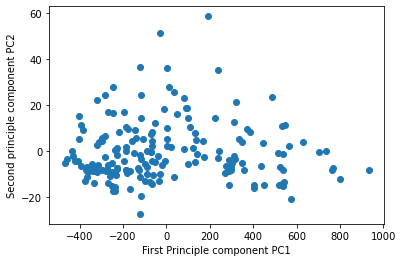

In [34]:
import matplotlib.pyplot as plt
plt.scatter(trans_data['PC1'],trans_data['PC2'])
plt.xlabel("First Principle component PC1")
plt.ylabel("Second principle component PC2")
plt.show()

In [35]:

#centroids_pca = pc.transform(cent)

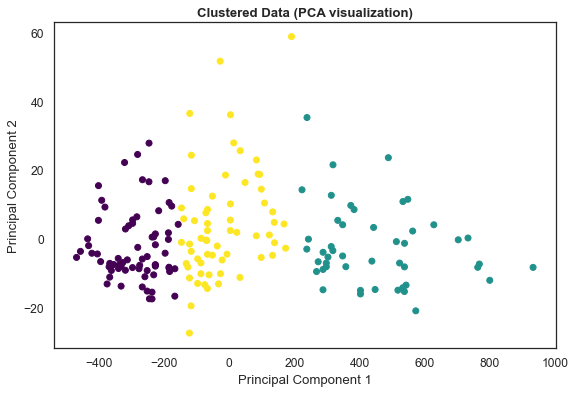

In [36]:
import seaborn as sns
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=trans_data['PC1'], y=trans_data['PC2'], c=km.labels_, cmap='viridis')
#plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],marker='x', s=169, linewidths=3,color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()


### My findings


In [37]:
#Here we used PCA to reduce the dimension of data before using kmeans clustering
# By reducing the number of features, we’re improving the performance of our algorithm
# By decreasing the number of features, i think that  the noise is also reduced.
# So when we did kmeans clustering after PCA , while plot the scatter plot-
# - we can see from the plot that we get 3 distinct clusters having 3 centroids  which is better than that of while plotting without using PCA

### hierarchical clustering

In [53]:
pc.explained_variance_ratio_ * 100

array([99.80849554,  0.17362245])

In [54]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(trans_data, method = "complete")

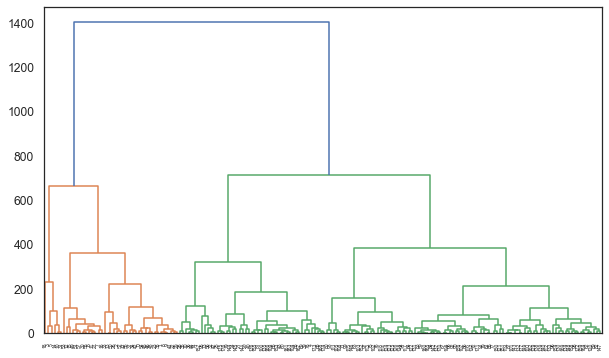

In [56]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = df.index)   ### interc cluster distance matrix
plt.show()

## DBSCAN

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

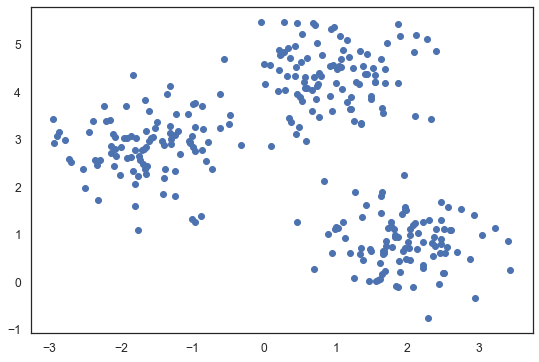

In [57]:
x, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(x[:,0], x[:,1])

In [58]:
#We can calculate the distance from each point to its closest neighbour using the NearestNeighbors
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

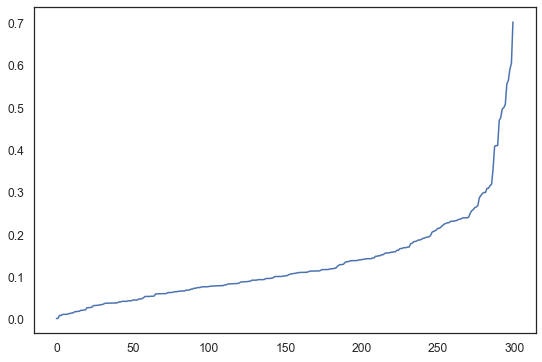

In [59]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [60]:
#We train our model, selecting 0.3 for eps and setting min_samples to 5.

In [62]:
m = DBSCAN(eps=0.3, min_samples=5)
m.fit(x)

DBSCAN(eps=0.3)

In [63]:
#The labels_ property contains the list of clusters and their respective points.

In [64]:
clusters = m.labels_

In [65]:
#Then, we map every individual cluster to a color.

In [66]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

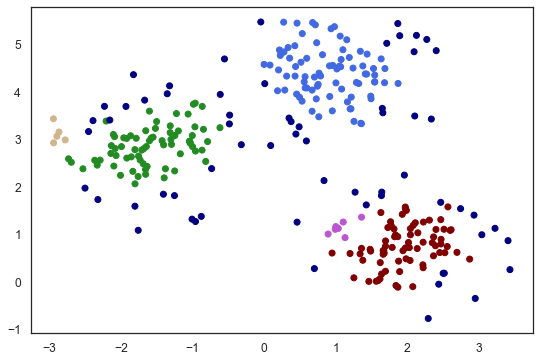

In [67]:
plt.scatter(x[:,0], x[:,1], c=vectorizer(clusters))

### My findings

In [ ]:
#Unlike k-means, DBSCAN will figure out the number of clusters.
#DBSCAN works by determining whether the minimum number of points are close enough to one another to be considered part of a single cluster.
#DBSCAN is very sensitive to scale since epsilon is a fixed value for the maximum distance between two points.